In [35]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [36]:
Cancer = pd.read_csv('Cancer.csv')
Cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [37]:
x= Cancer.iloc[:, 2:33]
y= Cancer.iloc[:, 1:2]

In [38]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [39]:
Ramdom_forest= RandomForestClassifier(n_estimators= 10, criterion= 'entropy')

In [40]:
Ramdom_forest.fit(x_train, y_train)

c:\Users\josel\OneDrive\Escritorio\Cursos\Python\Analisis de datos\datos\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [41]:
pred= Ramdom_forest.predict(x_test)
pred

array(['B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M'], dtype=object)

In [42]:
confusion_matrix= confusion_matrix(y_test, pred)
confusion_matrix

array([[74,  0],
       [ 2, 38]], dtype=int64)

In [43]:
presicion = precision_score(y_test, pred, pos_label='M')
print(f'{presicion:.4f}')

1.0000


In [44]:
exactitud= accuracy_score(y_test, pred)
exactitud

0.9824561403508771

In [45]:
sensibilida= recall_score(y_test, pred, pos_label= 'M')
sensibilida

0.95

In [46]:
f1_score= f1_score(y_test, pred, pos_label= 'M')
f1_score

0.9743589743589743

In [47]:
label_encoder = LabelEncoder()
# Ajusta y transforma las etiquetas de clase
y_test= label_encoder.fit_transform(y_test)
y_train= label_encoder.fit_transform(y_train)
pred= label_encoder.fit_transform(pred)

c:\Users\josel\OneDrive\Escritorio\Cursos\Python\Analisis de datos\datos\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\josel\OneDrive\Escritorio\Cursos\Python\Analisis de datos\datos\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
roc_auc= roc_auc_score(y_test, pred)
roc_auc
fpr, tpr, _ = roc_curve(y_test, pred)

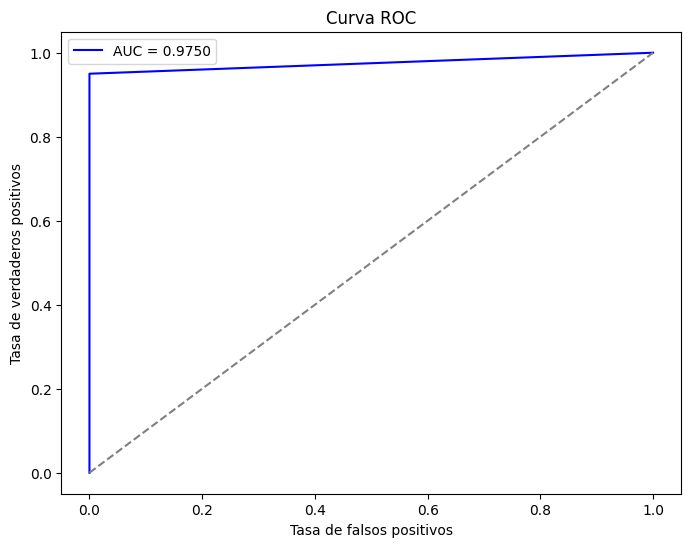

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

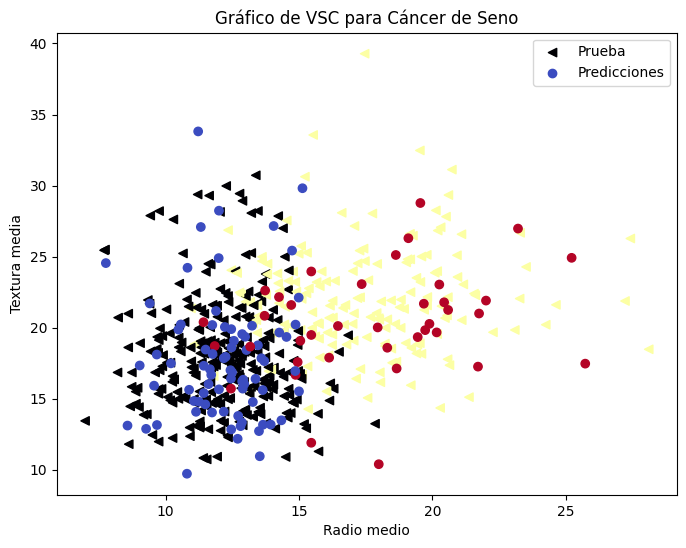

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train['radius_mean'], x_train['texture_mean'], c=y_train, marker= '<' , cmap='inferno', label='Prueba')
plt.scatter(x_test['radius_mean'], x_test['texture_mean'], c=pred, cmap='coolwarm', label='Predicciones')
plt.xlabel('Radio medio')
plt.ylabel('Textura media')
plt.title('Gráfico de VSC para Cáncer de Seno')
plt.legend()
plt.show()